### **Netflix Data Analysis**

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
# The lineterminator parameter is used to specify the character that separates lines in the file.
# In this case, it is set to "\n" to ensure that each line in the CSV file is correctly identified.
df = pd.read_csv("mymoviedb.csv", lineterminator="\n") 

###  **Checking the first 5 row**

In [69]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


### **Checking the info using df.info**

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


#### **Checking the Genre first 5 rows using Head**

In [71]:
df["Genre"].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

### **Checking the duplicated data exist or not using duplicated().sum()**

In [72]:
# df.duplicated() # if we did not use sum here we get bool values from first five rows and from last five rows
df.duplicated().sum()

np.int64(0)

### **using describe() for a short summary**

In [73]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


- ### **🔍 Exploration Summary**

- We have a dataframe consisting of **9,827 rows and 9 columns**.
- The dataset appears **tidy**, with **no NaN values** or **duplicates** present.
- The `Release_Date` column needs to be **converted to datetime format**, and **only the year** should be extracted.
- The columns `Overview`, `Original_Language`, and `Poster-Url` are **not useful for analysis** and will be **dropped**.
- There are **noticeable outliers** in the `Popularity` column.
- The `Vote_Average` column should be **categorized** for better analysis.
- The `Genre` column contains **comma-separated values and white spaces**; it needs to be **cleaned** and **converted to a categorical format**.


In [74]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


### **Data Preprocessing**

- 1. **Converting Release Date object dtype to datetime**

In [75]:
# we converted the release date object dtypes into datetime 

df["Release_Date"] = pd.to_datetime(df["Release_Date"])
print(df["Release_Date"].dtypes)

datetime64[ns]


In [76]:
df["Release_Date"] = df["Release_Date"].dt.year

df["Release_Date"].dtypes

dtype('int32')

- **We are checking now we get only year**

In [77]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


- **we have extracted the year from dt-mm-y**

#### **Now we are dropping the columns which is not useful according to question**

In [78]:
cols = ["Overview","Original_Language","Poster_Url"]
df.drop(columns=cols, axis=0, inplace=True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

### **Checking again that columns are removed or not**

In [79]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


- **categorizing Vote_Average column**

- we would cut the **Vote_Average** values and make 4 categories.**`popular`** **`average`** **`below_avg`** **`not_popular`** to describe it more using catigorize_col() function provided above

---

## **UserDefined Function**

- **Understand one thing for this function this is dynamic fn instead of hardcoding direct column name we use col to later reuse for any columns**
- **⚙️ Important: Yeh function dynamic hai — hardcoded column name ki jagah 'col' use kiya gaya hai taaki hum is function ko kisi bhi column ke liye reuse kar sakein.**
----
## - **Notes about above cell**
-  **🧠 Summary:**
- **col: dynamic column name hai, isliye yeh function reusable hai kisi bhi column ke liye.**
- **df[col].describe(): column ke stats nikalta hai bins banane ke liye.**
- **pd.cut: un bins ko category labels mein convert karta hai.**
- **duplicates="drop": agar kisi bin edge ki value repeat ho jaaye to usko hata deta hai error se bachne ke liye.**
- **Real-life analogy: Jaise students ke marks ko Fail/Pass/Topper mein divide karna, ya weight ko Light/Medium/Heavy mein.**
---

In [80]:
def categorizing_col(df, col, labels):
    
    edges = [
        df[col].describe()["min"],
        df[col].describe()["25%"],
        df[col].describe()["50%"],
        df[col].describe()["75%"],
        df[col].describe()["max"],
    ]
    
    df[col] = pd.cut(df[col], edges, labels=labels, duplicates="drop")
    
    return df
# ------------------------------------------------------------------------------------

# Explanation of this if you ever wanted whats happening here 

# def categorizing_col(df, col, labels):
    # def: Python ka keyword hai jisse hum function define karte hain.
    # categorizing_col: function ka naam hai — iska matlab hai 'categorize karne wali column'.
    # df: input dataframe (jaise Netflix data), jisme columns aur rows hote hain.
    # col: us column ka naam jisko hum categorize (bin) karna chahte hain.
    # labels: ek list of strings (jaise ["Low", "Medium", "High"]) jo categories ke naam honge.
    # Real-life analogy: Socho tumhare paas ek students ka result sheet (Excel) hai aur tum unke marks ko grades mein baantna chahte ho — jaise A, B, C.

    # edges = [
    #     df[col].describe()["min"],
    #     df[col].describe()["25%"],
    #     df[col].describe()["50%"],
    #     df[col].describe()["75%"],
    #     df[col].describe()["max"],
    # ]
    # edges: ek list banayi ja rahi hai jo column ke 5 key statistics se milke bani hai.
    # df[col].describe(): pandas ka function hai jo summary stats deta hai (min, max, median, etc).
    # "min", "25%", etc: yeh descriptive stats hain — minimum, 25th percentile, median (50%), 75th percentile, maximum.
    # Iska use isliye ho raha hai kyunki hum ye values ko use karke bins create kar rahe hain.
    # Hinglish: is line mein column ke numeric data ke range ke mutabiq 5 points nikaale gaye hain — chhoti se badi value tak.
    # Real-life analogy: Jaise tumne test ke scores ko group karne ke liye passing marks, average marks aur top marks use kiye.

    # df[col] = pd.cut(df[col], edges, labels=labels, duplicates="drop") ------
    # pd.cut(): pandas ka function hai jo numeric values ko bins mein divide karta hai.
    # df[col]: original column jisko categorize karna hai.
    # edges: bin boundaries (jaise 0-25, 25-50, etc).
    # labels: har bin ka naam (jaise ["Low", "Medium", "High"]).
    # duplicates="drop": agar koi bin repeat ho raha ho (jaise same min/max), toh usko hata do.
    # Hinglish: is line mein asli number values ko categories mein convert kar diya jaata hai.
    # Real-life analogy: Jaise tum ek weighing machine par 3 ranges bana do — 0–50 kg (Light), 51–70 (Medium), 71+ (Heavy).

    # return df
    # return: function ka output wapas bhejna.
    # df: ab yeh DataFrame modify ho chuka hai, aur jisme specified column ab categorized hai.
    # Hinglish: ab tumhare paas wohi Netflix data hai, lekin ek column categorize ho gaya hai.
    # Real-life analogy: Jaise tumne ek students ke list ko unke marks ke hisaab se "Fail", "Pass", "Excellent" mein tag kar diya ho.

#

In [81]:
labels = ["not_popular","below_avg","average","popular"] # We created labels here

categorizing_col(df,"Vote_Average",labels)

df["Vote_Average"].unique()


['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [82]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


- **Checking the total value count of diff popularity**

In [83]:
df["Vote_Average"].value_counts()
# value_counts() is exactly like frequency table we learn in statistics
#  Unique values in a column
# Along with their frequency (how many times each value appears)


Vote_Average
not_popular    2467
popular        2450
average        2412
below_avg      2398
Name: count, dtype: int64

- **we are removing duplicates values or NaN values**

In [84]:
df.dropna(inplace=True)
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [85]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


- ### **we'd split genres into a list and then explode our dataframe to have only one genre per row	for each movie**

In [86]:
# we are spliting genre on the basis of whitespace(blankspace)
df["Genre"] = df["Genre"].str.split(", ")

df = df.explode("Genre").reset_index(drop=True)

df.head()


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


- ### **casting column into category**

In [87]:
df["Genre"] = df["Genre"].astype("category")

df["Genre"].dtype

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

- ### **Checking info() again**

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.6+ KB


In [89]:
df.nunique()

Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

In [90]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


## **Data Visualization** 

In [91]:
sns.set_style("whitegrid")

- ## **What is the most frequent genre of movies released on Netflix?**


In [92]:
df["Genre"].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

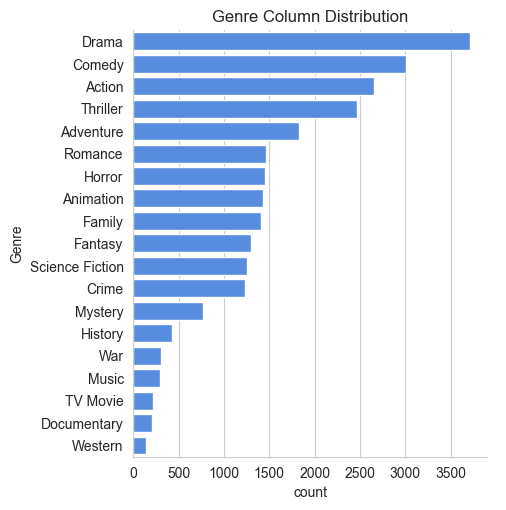

In [93]:
sns.catplot(y = "Genre",data=df , kind= "count",order=df["Genre"].value_counts().index,color="#4287f5")


plt.title("Genre Column Distribution")
plt.show()

- ### **Which has highest votes in vote avg column**

In [94]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


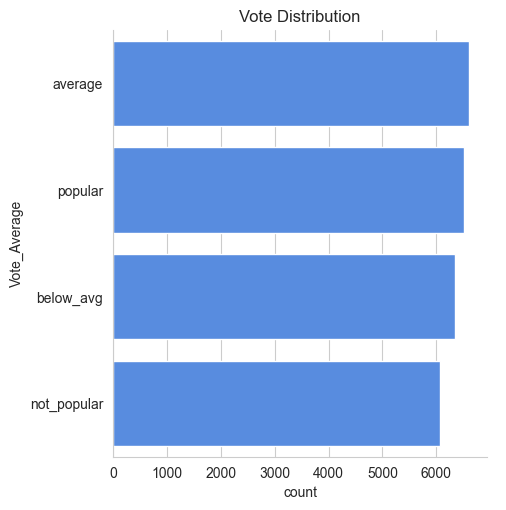

In [95]:
sns.catplot(y = "Vote_Average",data=df, kind="count",order=df["Vote_Average"].value_counts().index,color="#4287f5")

plt.title("Vote Distribution")
plt.show()

- ### **What movie got the highest popularity? what's its genre?**

In [96]:
df.head(2)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure


In [97]:
df[df["Popularity"]== df["Popularity"].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


- ### **What movie got the lowest popularity? what's its genre?**

In [98]:
df[df["Popularity"]== df["Popularity"].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,average,History
25549,1984,Threads,13.354,186,popular,War
25550,1984,Threads,13.354,186,popular,Drama
25551,1984,Threads,13.354,186,popular,Science Fiction


- ### **Which year has the most filmmed movies?**

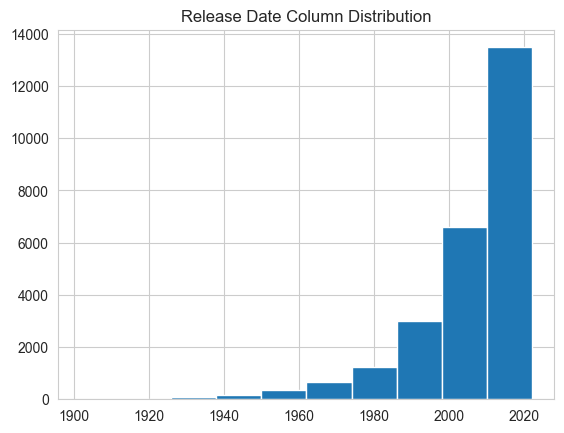

In [99]:
df["Release_Date"].hist()

plt.title("Release Date Column Distribution")

plt.show()

- ### **Conclusion**

- Q1: What is the most frequent genre in the dataset?
Drama genre is the most frequent genre in our dataset and has appeared more than 14% of the times among 19 other genres.

- Q2: What genres has highest votes?
we have 25.5% of our dataset with popular vote (6520 rows). Drama again gets the highest popularity among fans by having more than 18.3% of movies popularities.

- Q3: What movie got the highest popularity? what's its genre?
Spider-Man: No Way Home has the highest popularity rate in our dataset and it has genres of Action, Adventure and Science Fiction.

- Q3: What movie got the lowest popularity? what's its genre?
The united states, 'thread' has the highest lowest rate in our dataset and it has genres of music, drama, 'war', 'sci-fi' and history.

- Q4: Which year has the most filmed movies?
year 2020 has the highest filming rate in our dataset.